In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [ ]:

temperature = ctrl.Antecedent(np.arange(15, 36, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
people = ctrl.Antecedent(np.arange(0, 11, 1), 'people')

fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')
cooling_level = ctrl.Consequent(np.arange(0, 101, 1), 'cooling_level')


In [ ]:
temperature['cold'] = fuzz.trimf(temperature.universe, [15, 15, 20])
temperature['cool'] = fuzz.trimf(temperature.universe, [18, 22, 26])
temperature['comfortable'] = fuzz.trimf(temperature.universe, [24, 26, 28])
temperature['warm'] = fuzz.trimf(temperature.universe, [27, 30, 32])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 35, 35])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 40])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 55, 80])
humidity['high'] = fuzz.trimf(humidity.universe, [60, 100, 100])

people['few'] = fuzz.trimf(people.universe, [0, 0, 4])
people['moderate'] = fuzz.trimf(people.universe, [3, 5, 7])
people['many'] = fuzz.trimf(people.universe, [6, 10, 10])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 40])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [30, 55, 80])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [60, 100, 100])

cooling_level['low'] = fuzz.trimf(cooling_level.universe, [0, 0, 40])
cooling_level['medium'] = fuzz.trimf(cooling_level.universe, [30, 55, 80])
cooling_level['high'] = fuzz.trimf(cooling_level.universe, [60, 100, 100])


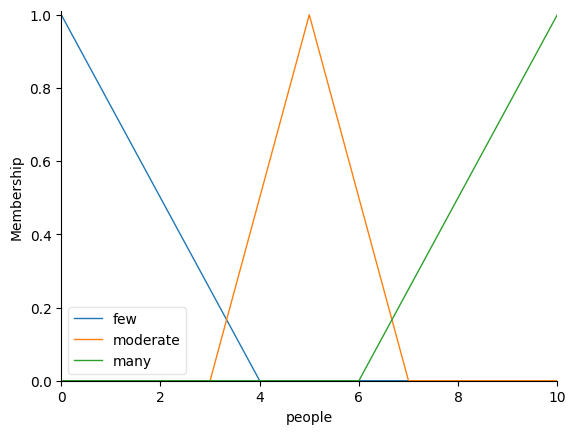

In [ ]:
people.view()

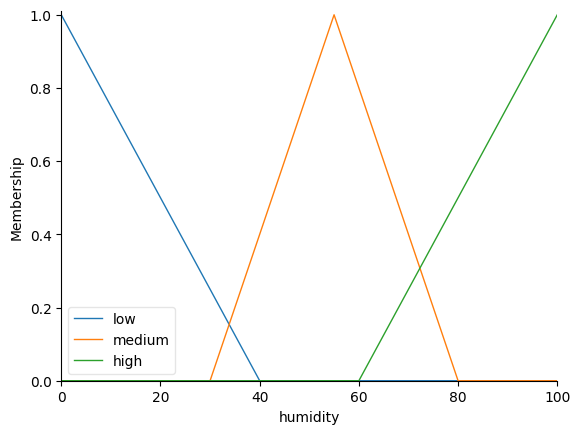

In [ ]:
humidity.view()

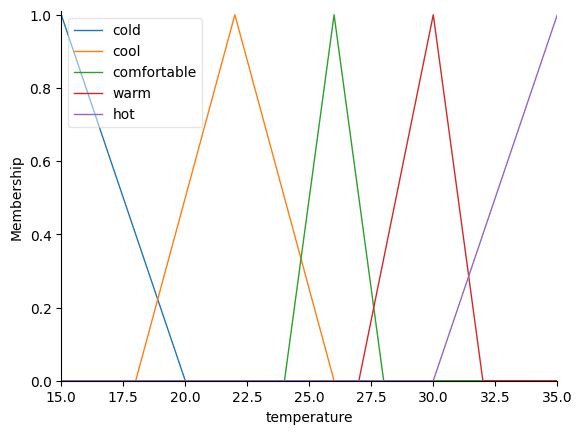

In [ ]:
temperature.view()

In [ ]:
rule1 = ctrl.Rule(temperature['cold'], (fan_speed['low'], cooling_level['low']))
rule2 = ctrl.Rule(temperature['cool'], (fan_speed['low'], cooling_level['low']))
rule3 = ctrl.Rule(temperature['comfortable'], (fan_speed['medium'], cooling_level['medium']))
rule4 = ctrl.Rule(temperature['warm'], (fan_speed['high'], cooling_level['high']))
rule5 = ctrl.Rule(temperature['hot'], (fan_speed['high'], cooling_level['high']))

rule6 = ctrl.Rule(humidity['low'], cooling_level['low'])
rule7 = ctrl.Rule(humidity['medium'], cooling_level['medium'])
rule8 = ctrl.Rule(humidity['high'], cooling_level['high'])

rule9 = ctrl.Rule(people['few'], fan_speed['low'])
rule10 = ctrl.Rule(people['moderate'], fan_speed['medium'])
rule11 = ctrl.Rule(people['many'], fan_speed['high'])

rule12 = ctrl.Rule(temperature['hot'] & humidity['high'] & people['many'], (cooling_level['high'], fan_speed['high']))
rule13 = ctrl.Rule(temperature['comfortable'] & humidity['medium'] & people['moderate'], (cooling_level['medium'], fan_speed['medium']))
rule14 = ctrl.Rule(temperature['cool'] & humidity['low'] & people['few'], (cooling_level['low'], fan_speed['low']))


In [ ]:

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14])
system = ctrl.ControlSystemSimulation(control_system)


system.input['temperature'] = 30
system.input['humidity'] = 70
system.input['people'] = 5

system.compute()
print("Fan Speed:", system.output['fan_speed'])
print("Cooling Level:", system.output['cooling_level'])


Fan Speed: 68.9502345178472
Cooling Level: 72.76293147079664
